In [1]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.activations import relu, sigmoid

from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

#from keras.preprocessing.image import ImageDataGenerator, load_data
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
training_data = 'dataset/training'
validation_data = 'dataset/validation'
batch_size = 64
img_size = 80 # width and height
epochs = 75

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (3, img_size, img_size)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 78, 78)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 78, 78)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 78, 78)        312       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 39, 39)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 37, 37)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 37, 37)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 37, 37)        148       
__________

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.2, shear_range=0.4, 
                                   rotation_range=40, height_shift_range=0.2, zoom_range=0.2, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(training_data, target_size=(img_size,img_size), class_mode='binary', batch_size = batch_size)
validation_batches = test_datagen.flow_from_directory(validation_data, target_size=(img_size, img_size), class_mode='binary', batch_size = batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
#@title Default title text
# checkpoint
from keras.callbacks import ModelCheckpoint
filepath="vgg_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

vgg_model=model.fit_generator(
        train_batches,
        steps_per_epoch=20000 // batch_size,
        epochs=75,
        validation_data=validation_batches,
        validation_steps=5000 // batch_size,
        callbacks=callbacks_list)

Epoch 1/75
312/312 [==============================] - 112s 359ms/step - loss: 0.7380 - acc: 0.5463 - val_loss: 2.1268 - val_acc: 0.5002

Epoch 00001: val_loss improved from inf to 2.12681, saving model to vgg_weights_best.hdf5
Epoch 2/75
312/312 [==============================] - 110s 352ms/step - loss: 0.6520 - acc: 0.6194 - val_loss: 2.1561 - val_acc: 0.4998

Epoch 00002: val_loss did not improve
Epoch 3/75
312/312 [==============================] - 110s 352ms/step - loss: 0.6251 - acc: 0.6541 - val_loss: 0.5890 - val_acc: 0.6887

Epoch 00003: val_loss improved from 2.12681 to 0.58902, saving model to vgg_weights_best.hdf5
Epoch 4/75
312/312 [==============================] - 110s 352ms/step - loss: 0.5870 - acc: 0.6936 - val_loss: 0.7508 - val_acc: 0.6436

Epoch 00004: val_loss did not improve
Epoch 5/75
312/312 [==============================] - 110s 351ms/step - loss: 0.5584 - acc: 0.7189 - val_loss: 0.8143 - val_acc: 0.5697

Epoch 00005: val_loss did not improve
Epoch 6/75
312/31

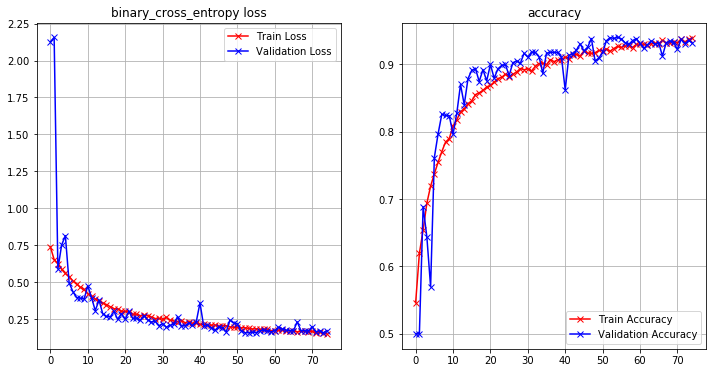

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss_accuracy(trained_model):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(trained_model.history["loss"],'r-x', label="Train Loss")
    ax.plot(trained_model.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('binary_cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(trained_model.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(trained_model.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(vgg_model)

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ImportError: No module named 'google.colab'

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('test1.zip', 'r')
zip_ref.extractall()
zip_ref.close()

0.998708
dog


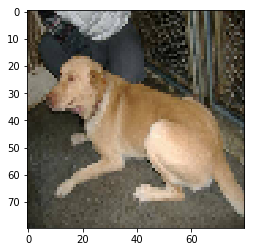

0.995684
dog


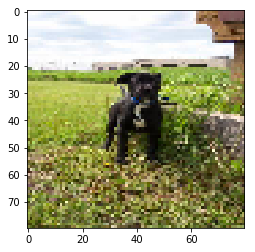

0.998933
dog


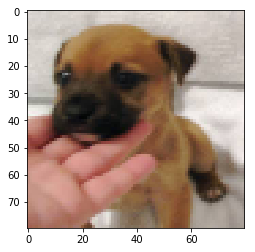

0.993952
dog


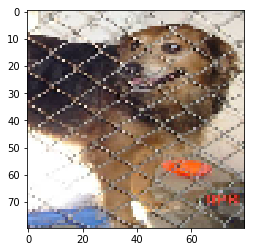

0.147483
cat


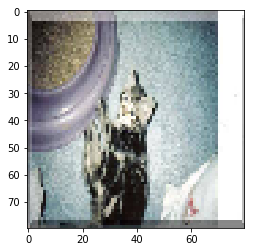

0.999561
dog


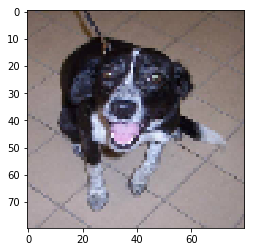

0.05999
cat


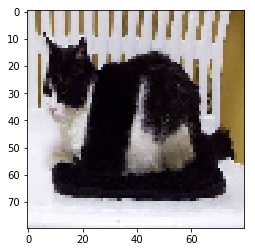

0.996182
dog


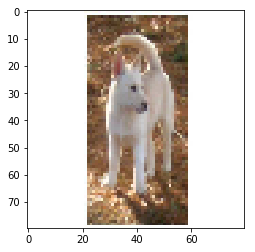

0.960154
dog


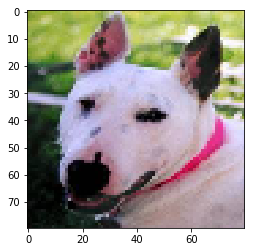

0.00265071
cat


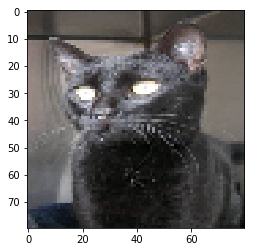

0.0548418
cat


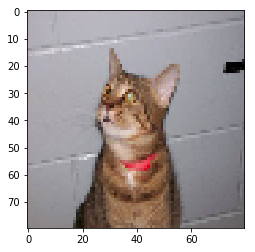

0.00245748
cat


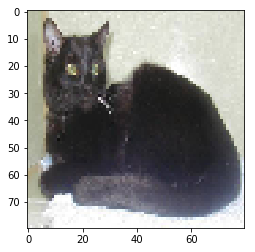

0.996148
dog


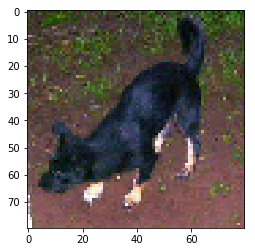

0.985062
dog


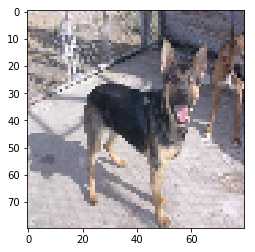

0.997198
dog


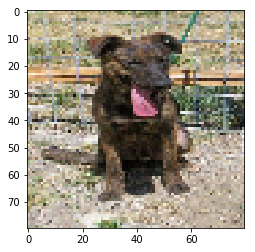

0.000250106
cat


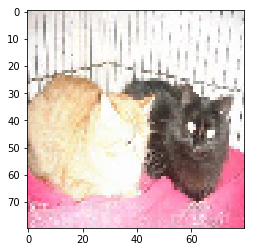

0.010899
cat


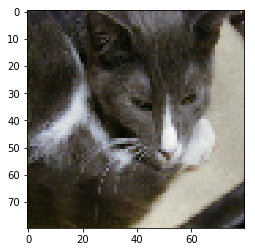

0.00204159
cat


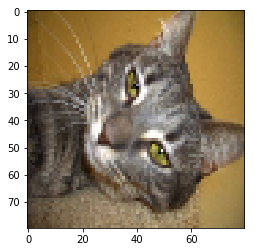

0.00134966
cat


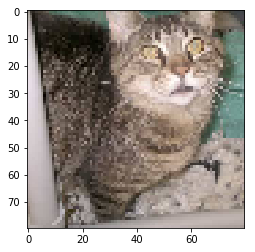

0.000421021
cat


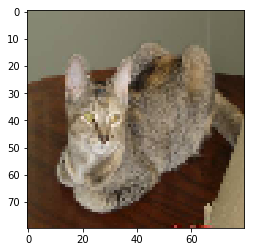

0.00010115
cat


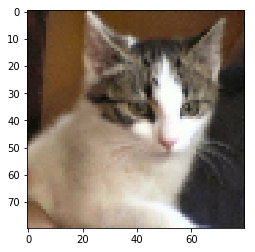

0.000358173
cat


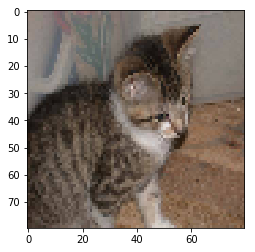

0.956594
dog


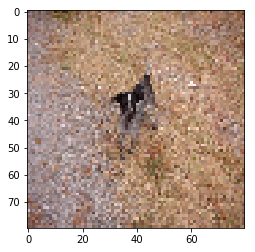

0.0271331
cat


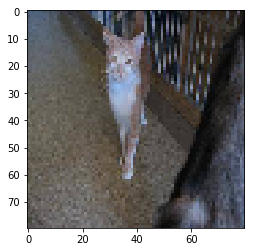

0.996306
dog


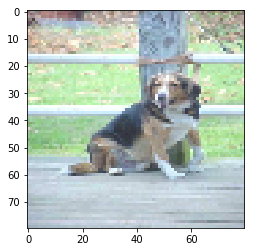

0.636644
dog


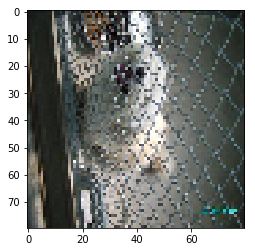

0.968761
dog


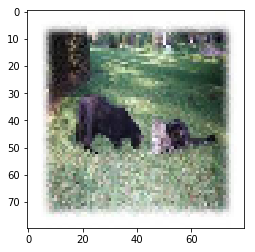

0.998757
dog


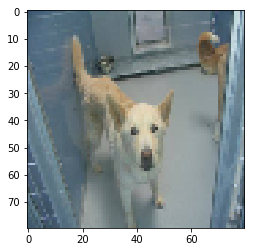

0.662605
dog


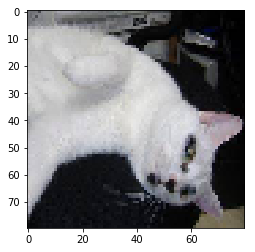

0.772783
dog


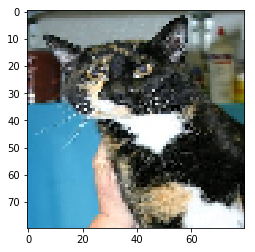

0.999889
dog


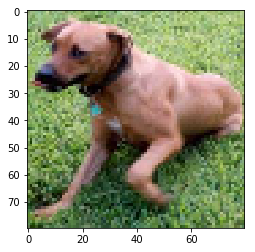

0.999841
dog


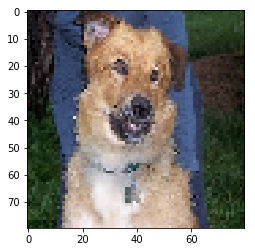

0.0977967
cat


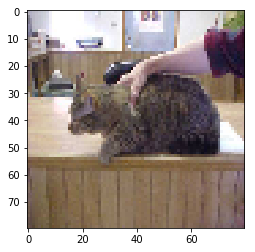

0.0197104
cat


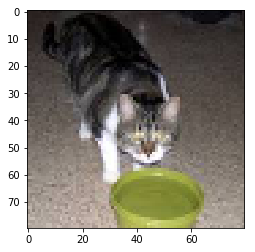

0.00102104
cat


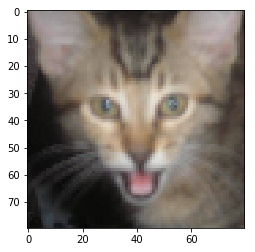

0.989056
dog


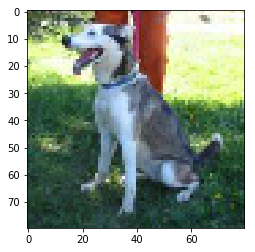

0.982798
dog


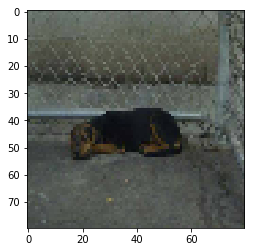

0.000245552
cat


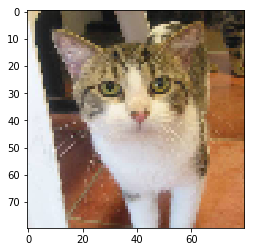

6.25346e-06
cat


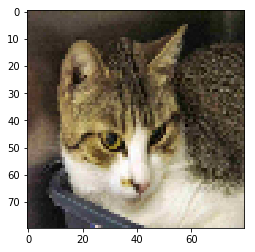

0.0535352
cat


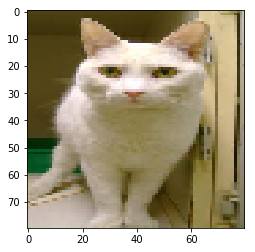

0.252754
cat


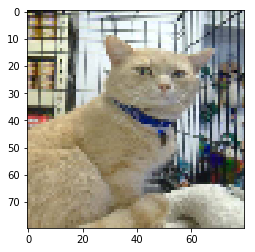

0.915845
dog


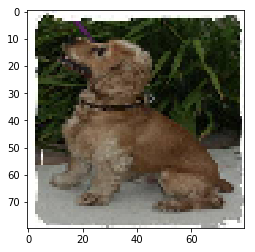

0.00845092
cat


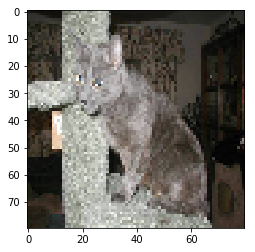

0.999964
dog


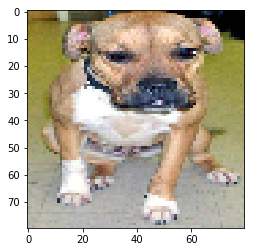

0.999231
dog


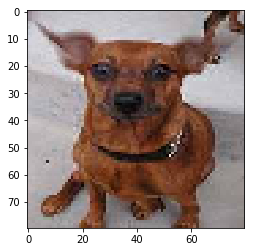

0.992541
dog


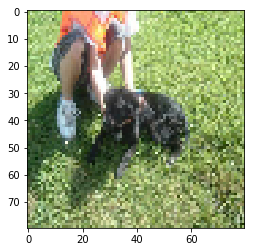

0.996878
dog


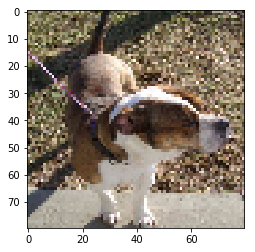

0.999286
dog


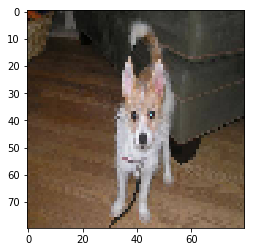

0.993153
dog


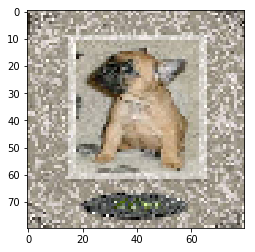

0.0202372
cat


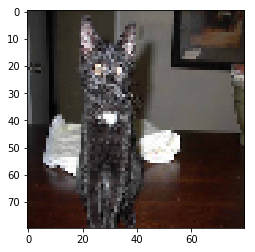

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

list_of_imgs = []
img_dir = "test1"
i=0
for img in os.listdir(img_dir):
    img_name = os.path.join(img_dir, img)
    if not img.endswith(".jpg"):
        continue
    img = image.load_img(img_name, target_size=(80, 80))
    test_image = image.img_to_array(img)/255
    x = model.predict(np.array([test_image]), batch_size=None)
    if(x[0][0] < 0.5):
        print(x[0][0])
        print("cat")
    else:
        print(x[0][0])
        print("dog")
    plt.imshow(img)
    plt.show(img)
    i+=1
    if i == 50:
        break
    